# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import datetime as dt
from matplotlib import pyplot as plt

# 1.0 Load Data

Datasets downloaded from https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UBIG3F

## 1.1 voter detail

In [2]:
# load each file and combine into a single dataframe
path = r'path to 20170207_VoterDetail.7z'
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, 
                     sep='\t', 
                     header=None,
                     names=['county_code', 'voter_id', 'name_last', 'name_suffix', 
                            'name_first', 'name_middle', 'requested_public_records_exemption',
                           'residence_address_line_1', 'residence_address_line_2', 'residence_city',
                           'residence_state', 'residence_zipcode', 'mailing_address_line_1,',
                           'mailing_address_line_2', 'mailing_address_line_3', 'mailing_city',
                           'mailing_state', 'mailing_zipcode', 'mailing_country', 'gender', 'race',
                           'birth_date', 'registration_date', 'party_affiliation', 'precinct',
                           'precinct_group', 'precinct_split', 'precinct_suffix', 'voter_status',
                           'congressional_district', 'house_district', 'senate_district',
                           'county_commission_district', 'school_board_district', 'daytime_area_code',
                           'daytime_phone_number', 'daytime_phone_extension', 'email_address'])
    li.append(df)

detail = pd.concat(li, axis=0, ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (11,14,17,18,27,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print('row count: ' + str(len(detail)))

# drop null birthdays - these are voters who requested public records exemption
detail.dropna(subset=['birth_date'], inplace=True)
print('row count after removing null birthdays: ' + str(len(detail)))

# drop null registration dates
detail.dropna(subset=['registration_date'], inplace=True)
print('row count after removing null registration dates: ' + str(len(detail)))

row count: 13710358
row count after removing null birthdays: 13654118
row count after removing null registration dates: 13654118


In [4]:
# convert date fields from object dtype to datetime
date_cache = {k: pd.to_datetime(k, errors='coerce') for k in detail['birth_date'].unique()}
detail['birth_date'] = detail['birth_date'].map(date_cache)

date_cache = {k: pd.to_datetime(k, errors='coerce') for k in detail['registration_date'].unique()}
detail['registration_date'] = detail['registration_date'].map(date_cache)

In [5]:
detail.head()

,county_code,voter_id,name_last,name_suffix,name_first,name_middle,requested_public_records_exemption,residence_address_line_1,residence_address_line_2,residence_city,...,voter_status,congressional_district,house_district,senate_district,county_commission_district,school_board_district,daytime_area_code,daytime_phone_number,daytime_phone_extension,email_address
0,CHA,102654245,Nodes,NaN,Melvin,R,N,8320 Riverside DR,UNIT 4179,Punta Gorda,...,ACT,17.0,75.0,26.0,1.0,1.0,941,5056229,NaN,
1,CHA,116777380,Oldbear,NaN,Kaili,Nicole,N,5016 Palangos DR,,Punta Gorda,...,ACT,17.0,75.0,26.0,1.0,1.0,NaN,NaN,NaN,KAILINICOLE@ROCKETMAIL.COM
2,CHA,111684516,Dunn,NaN,Cora,M,N,23053 Westchester BLVD,APT L501,Port Charlotte,...,ACT,17.0,75.0,26.0,1.0,1.0,NaN,NaN,NaN,
3,CHA,121565689,Espino,NaN,Melissa,Faye,N,2511 Luther RD,APT 225,Punta Gorda,...,ACT,17.0,75.0,26.0,1.0,1.0,NaN,NaN,NaN,
4,CHA,113812700,Eno,NaN,Camille,Marie,N,24437 Harborview RD,LOT 19,Port Charlotte,...,ACT,17.0,75.0,26.0,1.0,1.0,863,7098529,NaN,


In [6]:
detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13654118 entries, 0 to 13710357
Data columns (total 38 columns):
county_code                           object
voter_id                              int64
name_last                             object
name_suffix                           object
name_first                            object
name_middle                           object
requested_public_records_exemption    object
residence_address_line_1              object
residence_address_line_2              object
residence_city                        object
residence_state                       object
residence_zipcode                     object
mailing_address_line_1,               object
mailing_address_line_2                object
mailing_address_line_3                object
mailing_city                          object
mailing_state                         object
mailing_zipcode                       object
mailing_country                       object
gender                         

## 1.2 voter history

In [7]:
# load files and combine into single dataframe
path = r'path to 20170207_VoterHistory.7z'
all_files = glob.glob(path + "/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, 
                     sep='\t', 
                     header=None,
                     names=['county_code', 'voter_id', 'election_date', 'election_type', 'history_code'])
    li.append(df)

hist = pd.concat(li, axis=0, ignore_index=True)

In [8]:
# convert date field from object dtype to datetime
date_cache = {k: pd.to_datetime(k) for k in hist['election_date'].unique()}
hist['election_date'] = hist['election_date'].map(date_cache)

In [9]:
hist.head()

,county_code,voter_id,election_date,election_type,history_code
0,PIN,100021934,2016-11-08,GEN,Y
1,PIN,100021442,2007-03-13,OTH,Y
2,PIN,100047465,2014-03-11,GEN,Y
3,PIN,100046570,2008-11-04,GEN,A
4,PIN,100052464,2014-11-04,GEN,Y


In [10]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72770189 entries, 0 to 72770188
Data columns (total 5 columns):
county_code      object
voter_id         int64
election_date    datetime64[ns]
election_type    object
history_code     object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.7+ GB


In [11]:
hist.election_date.min()

Timestamp('2006-01-10 00:00:00')

In [12]:
hist.election_date.max()

Timestamp('2017-01-31 00:00:00')

# 2.0 Prepare Dataset for Analysis

## 2.1 Limit voting history dataset to Primary and General Elections with 100k votes

In [13]:
hist.history_code.unique()

array(['Y', 'A', 'E', 'P', 'N', 'B'], dtype=object)

In [14]:
print('row count: ' + str(len(hist)))
# remove rows from voter history where history_code is N (did not vote), B (absentee ballot not counted), or P (provisional ballot not counted)
hist = hist[hist.history_code.isin(['A','E','Y'])]
print("""after removing votes that didn't count: """ + str(len(hist)))

# limit voter history dataset to Primary and General elections with at least 100k votes, so that after the cartesian join below the size of the dataframe is manageable
elections = pd.DataFrame(hist.groupby(['election_date','election_type']).county_code.count()).reset_index()
elections = elections[(elections.county_code > 1000000) & (elections.election_type.isin(['GEN','PRI']))][['election_date', 'election_type']]
hist = hist.merge(elections, how='inner', left_on=['election_date','election_type'], right_on=['election_date','election_type'])
print('after limiting to pri & gen elections with >100k votes: ' + str(len(hist)))

# remove dupes from voter history
hist.drop_duplicates(subset=['voter_id', 'election_date','election_type'], inplace=True)
print('after removing dupes: ' + str(len(hist)))

row count: 72770189
after removing votes that didn't count: 66388968
after limiting to pri & gen elections with >100k votes: 51080693
after removing dupes: 51077533


## 2.2 Cartesian product registration detail and election_date-election_type

In [15]:
# get cartesian product of elections with voter registration detail, so primary key = voter_id-election_date-election_type
elections['key'] = 1
detail['key'] = 1

df = detail[['voter_id','birth_date','registration_date','race','gender','key']].merge(elections, left_on='key', right_on='key')
df.drop('key', inplace=True, axis=1)
print('row count after cartesian product: ' + str(len(df)))

row count after cartesian product: 163849416


In [16]:
df.head()

,voter_id,birth_date,registration_date,race,gender,election_date,election_type
0,102654245,1932-08-28,2003-10-21,5,M,2006-09-05,PRI
1,102654245,1932-08-28,2003-10-21,5,M,2006-11-07,GEN
2,102654245,1932-08-28,2003-10-21,5,M,2008-08-26,PRI
3,102654245,1932-08-28,2003-10-21,5,M,2008-11-04,GEN
4,102654245,1932-08-28,2003-10-21,5,M,2010-08-24,PRI


## 2.3 Left join on voter history

In [17]:
# left join on hist to determine if the voter_id voted in that election_date-election_type
hist['voted'] = 1
df = df.merge(hist[['voter_id','election_date','election_type','history_code','voted']], how='left', left_on=['voter_id','election_date','election_type'], right_on=['voter_id','election_date','election_type'])

In [18]:
# make sure same row count as above
df.shape

(163849416, 9)

In [19]:
# create column for voted 0 = no
df['voted'] = df.voted.fillna(value=0)

# set voted dtype to bool
df['voted'] = df.voted.astype(bool)

In [20]:
# make sure there are no null election dates
len(df[df.election_date.isnull()])

0

In [21]:
# remove rows where registration date does not meet the deadline for voting
# the deadline to register to vote for an upcoming election is 29 days before the election (https://dos.myflorida.com/elections/for-voters/voter-registration/register-to-vote-or-update-your-information/)
df['registration_deadline'] = df['election_date'] -  pd.to_timedelta(29, unit='d')
df = df[df.registration_date <= df.registration_deadline]
print('row count after removing persons that did not meet registration deadline: ' + str(len(df)))

row count after removing persons that did not meet registration deadline: 121468138


In [22]:
# only include in-person votes at the polls
df = df[~df.history_code.isin(['E','A'])]
print('after removing votes that were not in person: ' + str(len(df)))

after removing votes that were not in person: 95182423


In [23]:
# calculate voter age
df['age'] = ((df['election_date'] - df['birth_date']).dt.days / 365).astype(int)

In [24]:
# limit data set to persons at least 18 years old on election day
df = df[df.age>=18]
print('row count after removing persons < 18 years: ' + str(len(df)))

row count after removing persons < 18 years: 94512190


In [25]:
# exclude persons over 110 (likely a data quality issue)
df = df[df.age <100]
print('row count after removing persons > 100 years: ' + str(len(df)))

row count after removing persons > 100 years: 94468159


In [26]:
filters = pd.DataFrame([['Total_Voters', 163849416],
                        ['After Removing Non-Registered Voters', 121468138],
                        ['After Removing votes that were not in person', 95182423],
                        ['After Removing Voters <18 years', 94512190], 
                        ['After Removing Voters >100 years', 94468159]]).rename(columns={0: 'Population', 1: 'n_voters'}).set_index('Population')

In [27]:
filters['pct_change'] = (filters.pct_change()*100).round(2)

In [28]:
filters.to_csv('tab1_FL_filters.csv')

In [29]:
filters

,n_voters,pct_change
Population,,
Total_Voters,163849416,NaN
After Removing Non-Registered Voters,121468138,-25.87
After Removing votes that were not in person,95182423,-21.64
After Removing Voters <18 years,94512190,-0.70
After Removing Voters >100 years,94468159,-0.05


## 2.4 Calc days between birth_date and election_date

In [30]:
# calculate the difference in number of days between birth_date and election_date
df['bd_day_of_month'] = df.birth_date.dt.day.astype(str)
df['bd_month_of_year'] = df.birth_date.dt.month.astype(str)
df['election_year'] = df.election_date.dt.year.astype(str)
df['birthday_election_year'] = pd.to_datetime(df['election_year'] + '-' + df['bd_month_of_year'] + '-' + df['bd_day_of_month'], errors='coerce')

df['days'] = (df['birthday_election_year'] - df['election_date']).dt.days

In [31]:
# check that where days==0, month/day of birth_date matches month/day of election_date
print('check that where days==0, month/day of birth_date matches month/day of election_date')
df[df.days==0].iloc[50000:50010, :]

check that where days==0, month/day of birth_date matches month/day of election_date


,voter_id,birth_date,registration_date,race,gender,election_date,election_type,history_code,voted,registration_deadline,age,bd_day_of_month,bd_month_of_year,election_year,birthday_election_year,days
29825217,115123878,1952-11-04,2007-04-12,5,F,2014-11-04,GEN,Y,True,2014-10-06,62,4,11,2014,2014-11-04,0.0
29825767,115786098,1990-11-06,2008-01-18,5,F,2012-11-06,GEN,Y,True,2012-10-08,22,6,11,2012,2012-11-06,0.0
29826022,104785359,1922-08-30,2002-03-01,5,F,2016-08-30,PRI,NaN,False,2016-08-01,94,30,8,2016,2016-08-30,0.0
29826930,113985541,1961-08-14,2006-01-12,4,M,2012-08-14,PRI,NaN,False,2012-07-16,51,14,8,2012,2012-08-14,0.0
29828018,114245170,1943-08-26,2006-04-19,5,F,2008-08-26,PRI,NaN,False,2008-07-28,65,26,8,2008,2008-08-26,0.0
29828024,114245170,1943-08-26,2006-04-19,5,F,2014-08-26,PRI,NaN,False,2014-07-28,71,26,8,2014,2014-08-26,0.0
29828352,113450218,1936-09-05,1974-09-11,5,F,2006-09-05,PRI,NaN,False,2006-08-07,70,5,9,2006,2006-09-05,0.0
29828426,100446545,1973-08-26,2007-03-29,5,M,2008-08-26,PRI,NaN,False,2008-07-28,35,26,8,2008,2008-08-26,0.0
29828432,100446545,1973-08-26,2007-03-29,5,M,2014-08-26,PRI,NaN,False,2014-07-28,41,26,8,2014,2014-08-26,0.0
29830182,116541706,1971-08-14,2008-08-15,3,M,2012-08-14,PRI,NaN,False,2012-07-16,41,14,8,2012,2012-08-14,0.0


# 3.0 Analysis

In [32]:
df['year'] = df.election_date.dt.year

In [33]:
summary_table = df.groupby(['year','election_type','election_date']).voted.agg(['count','mean']).rename(columns={'count': 'n_eligible_voters','mean': 'prop_voted'}).sort_values(by=['election_date'])

In [34]:
summary_table['prop_voted'] = (summary_table.prop_voted*100).round(2)

In [35]:
summary_table

n_eligible_voters  prop_voted
year election_type election_date                               
2006 PRI           2006-09-05               6946517       16.73
     GEN           2006-11-07               6310946       41.92
2008 PRI           2008-08-26               7739767       12.41
     GEN           2008-11-04               4996307       65.22
2010 PRI           2010-08-24               8412636       14.73
     GEN           2010-11-02               7398605       37.62
2012 PRI           2012-08-14               9262955       12.14
     GEN           2012-11-06               6307756       55.54
2014 PRI           2014-08-26              10433056        7.93
     GEN           2014-11-04               8681007       31.73
2016 PRI           2016-08-30              11183556       10.01
     GEN           2016-11-08               6795051       42.78

In [36]:
summary_table.to_csv('tab2_FL_summary_table.csv')

## 3.1 Check for fake birthdays

Look for fake birthdays by identifying a month/day with a high # of occurrences compared to the previous day (e.g. many voters reported their birthday on 1/1)

In [37]:
# count the number of birthday occurences on each day of the year
bd = detail[['voter_id','birth_date']]
bd.loc[:,'day'] = detail.birth_date.dt.day
bd.loc[:,'month'] = detail.birth_date.dt.month
bd_count = pd.DataFrame(bd.groupby(['month','day']).voter_id.count().sort_values(ascending=False).rename('count')).reset_index()

# sort by month and day
bd_count.sort_values(by=['month','day'], inplace=True) 

# get diff from previous day
bd_count['prev_day_count'] = bd_count['count'].diff() 

# calc diff from previous day on Jan 1
bd_count.loc[(bd_count.month==1) & (bd_count.day==1), 'prev_day_count'] = bd_count.loc[(bd_count.month==1) & (bd_count.day==1), 'count'].item() - bd_count.loc[(bd_count.month==12) & (bd_count.day==31), 'count'].item()

bd_pivot = pd.pivot_table(bd_count,'prev_day_count','month','day')
bd_pivot

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,1109.0,-4188.0,1266.0,461.0,-58.0,423.0,-569.0,-323.0,-322.0,1384.0,...,-544.0,-130.0,105.0,316.0,-167.0,-324.0,451.0,-658.0,97.0,-599.0
2,1518.0,871.0,-1211.0,-321.0,453.0,-777.0,757.0,-164.0,-127.0,1172.0,...,1350.0,-1095.0,373.0,-301.0,-30.0,38.0,1040.0,-29014.0,NaN,NaN
3,28867.0,-249.0,847.0,-1092.0,197.0,-310.0,-180.0,288.0,-723.0,768.0,...,-94.0,61.0,157.0,392.0,-761.0,239.0,-118.0,-677.0,261.0,-301.0
4,952.0,-178.0,-518.0,1156.0,-805.0,-156.0,265.0,-302.0,-310.0,886.0,...,-37.0,-20.0,-199.0,557.0,-842.0,111.0,1041.0,-753.0,-309.0,NaN
5,1760.0,-1145.0,-304.0,-102.0,1889.0,-1471.0,40.0,74.0,-573.0,1230.0,...,509.0,-211.0,-188.0,706.0,-694.0,-1.0,385.0,-249.0,-1015.0,-184.0
6,2654.0,-744.0,-304.0,-87.0,436.0,273.0,-341.0,-105.0,168.0,655.0,...,481.0,182.0,-22.0,368.0,-285.0,204.0,-202.0,464.0,325.0,NaN
7,908.0,-823.0,-906.0,-1900.0,1214.0,1746.0,1043.0,-615.0,-513.0,691.0,...,361.0,-43.0,-316.0,258.0,-191.0,391.0,330.0,-96.0,-318.0,-435.0
8,1391.0,-849.0,0.0,6.0,476.0,-183.0,6.0,1051.0,-1390.0,1220.0,...,43.0,-295.0,253.0,494.0,-303.0,-15.0,751.0,-631.0,-237.0,-285.0
9,1158.0,-1216.0,62.0,-50.0,189.0,80.0,100.0,1377.0,342.0,5.0,...,396.0,-313.0,49.0,31.0,-219.0,-126.0,140.0,-336.0,-465.0,NaN


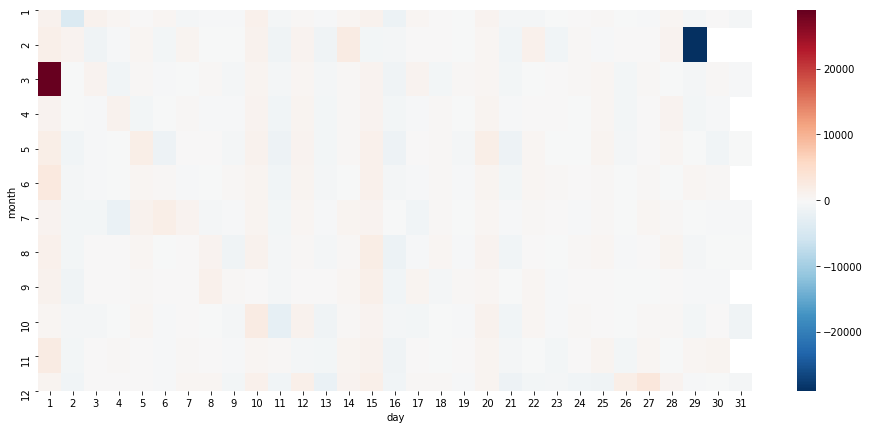

In [38]:
plt.figure(figsize=(16, 7))
sns.heatmap(bd_pivot, cmap="RdBu_r", center=bd_count['prev_day_count'].mean())
plt.savefig('fig1_FL_bday_count.png')

The only dates that stand out as an outlier are a large decrease in number of birthdays on February 29th vs. February 28th, and a large increase in number of birthdays on March 1st vs. February 29th. This is expected because February 29th only occurrs on a leap year.

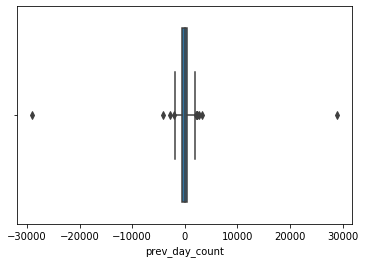

In [39]:
# boxplot of diff from prev day
sns.boxplot(bd_count.prev_day_count)
plt.savefig('fig2_FL_bday_count_boxplot.png')

## 3.2 Primary vs. General & Midterms vs. Presidential

We expect to see higher turnout for general elections than primary elections.
We expect to see higher turnout for presidential elections than midterms.

In [40]:
df.election_date.unique()

array(['2006-09-05T00:00:00.000000000', '2012-08-14T00:00:00.000000000',
       '2014-08-26T00:00:00.000000000', '2016-08-30T00:00:00.000000000',
       '2010-08-24T00:00:00.000000000', '2010-11-02T00:00:00.000000000',
       '2012-11-06T00:00:00.000000000', '2014-11-04T00:00:00.000000000',
       '2016-11-08T00:00:00.000000000', '2006-11-07T00:00:00.000000000',
       '2008-08-26T00:00:00.000000000', '2008-11-04T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [41]:
election_type_summary = pd.DataFrame(df.groupby('election_type').voted.mean()).rename(columns={'voted': 'prop_voted'})
election_type_summary['prop_voted'] = (election_type_summary.prop_voted*100).round(2)

In [42]:
election_type_summary

,prop_voted
election_type,
GEN,44.09
PRI,11.92


In [43]:
df['election_type2'] = np.where(df.year.isin([2006,2010,2014]), 'Midterms', 'Presidential')

In [44]:
election_type_summary2 = pd.DataFrame(df.groupby('election_type2').voted.mean()).rename(columns={'voted': 'prop_voted'})
election_type_summary2['prop_voted'] = (election_type_summary2.prop_voted*100).round(2)

In [45]:
election_type_summary2 = election_type_summary2.reset_index().rename(columns={'election_type2': 'election_type'}).set_index('election_type')

In [46]:
election_type_summary2

,prop_voted
election_type,
Midterms,23.68
Presidential,27.81


In [47]:
election_type_summary.to_csv('tab3_FL_election_type.csv')
election_type_summary2.to_csv('tab4_FL_election_year.csv')

## 3.3 Turnout groupby age

In [48]:
# groupby age - all elections
turnout_groupby_age = df.groupby(['age']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'voted', 'count': 'n_total', 'sum': 'n_voters'})
turnout_groupby_age['n_nonvoters'] = turnout_groupby_age.n_total - turnout_groupby_age.n_voters
turnout_groupby_age['voted'] = turnout_groupby_age['voted']*100

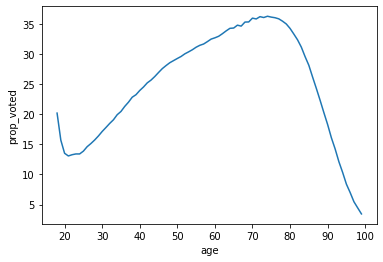

In [49]:
sns.lineplot(x='age', y='voted', data=turnout_groupby_age)
plt.ylabel('prop_voted')
plt.savefig('fig3_FL_age.png')

In [50]:
# groupby age-election_type
turnout_groupby_age_election_type = df.groupby(['age','election_type']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'voted', 'count': 'n_total', 'sum': 'n_voters'})
turnout_groupby_age_election_type['n_nonvoters'] = turnout_groupby_age_election_type.n_total - turnout_groupby_age_election_type.n_voters
turnout_groupby_age_election_type['voted'] = turnout_groupby_age_election_type['voted']*100

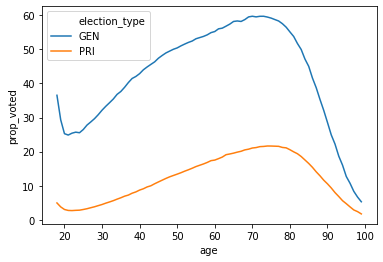

In [51]:
sns.lineplot(x='age', y='voted', hue='election_type', data=turnout_groupby_age_election_type)
plt.ylabel('prop_voted')
plt.savefig('fig4_FL_age_election_type.png')

In [52]:
# gropuby age-electionyear
turnout_groupby_age_election_type2 = df.groupby(['age','election_type2']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'voted', 'count': 'n_total', 'sum': 'n_voters'})
turnout_groupby_age_election_type2['n_nonvoters'] = turnout_groupby_age_election_type2.n_total - turnout_groupby_age_election_type2.n_voters
turnout_groupby_age_election_type2['voted'] = turnout_groupby_age_election_type2['voted']*100

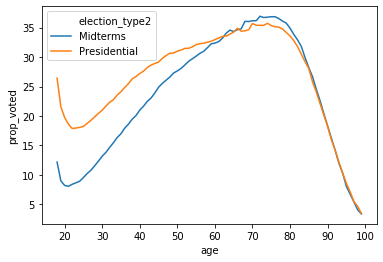

In [53]:
sns.lineplot(x='age', y='voted', hue='election_type2', data=turnout_groupby_age_election_type2)
plt.ylabel('prop_voted')
plt.savefig('fig5_FL_age_election_year.png')

## 3.4 Turnout groupby race

In [54]:
turnout_groupby_race = df.groupby(['race']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'voted', 'count': 'n_total', 'sum': 'n_voters'})
turnout_groupby_race['n_nonvoters'] = turnout_groupby_race.n_total - turnout_groupby_race.n_voters
turnout_groupby_race['voted'] = turnout_groupby_race['voted']*100

In [55]:
turnout_groupby_race.race.replace({1: 'American Indian or Alaska Native',
                                   2: 'Asian or Pacific Islander',
                                   3: 'Black, Not Hispanic',
                                   4: 'Hispanic',
                                   5: 'White, Not Hispanic',
                                   6: 'Other',
                                   7: 'Multi-racial',
                                   9: 'Unknown'}, inplace=True)

In [56]:
turnout_groupby_race.voted = turnout_groupby_race.voted.round(2)
turnout_groupby_race.n_voters = turnout_groupby_race.n_voters.astype(int)
turnout_groupby_race.n_nonvoters = turnout_groupby_race.n_nonvoters.astype(int)

In [57]:
turnout_groupby_race

,race,voted,n_total,n_voters,n_nonvoters
0,American Indian or Alaska Native,23.47,316579,74312,242267
1,Asian or Pacific Islander,16.78,1610740,270359,1340381
2,"Black, Not Hispanic",22.71,12979219,2947888,10031331
3,Hispanic,17.79,14266859,2538550,11728309
4,"White, Not Hispanic",28.84,61697363,17794928,43902435
5,Other,19.87,1500689,298215,1202474
6,Multi-racial,16.61,422260,70135,352125
7,Unknown,17.38,1674450,291066,1383384


In [58]:
turnout_groupby_race.to_csv('tab5_FL_race.csv')

[Text(0, 0, 'American Indian or Alaska Native'),
 Text(0, 0, 'Asian or Pacific Islander'),
 Text(0, 0, 'Black, Not Hispanic'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'White, Not Hispanic'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Multi-racial'),
 Text(0, 0, 'Unknown')]

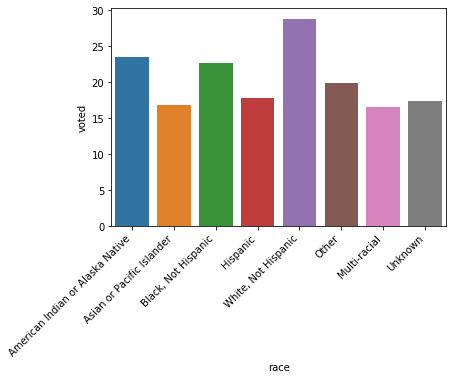

In [59]:
plt = sns.barplot(x='race', y='voted', data=turnout_groupby_race)
plt.set_xticklabels(plt.get_xticklabels(), rotation=45, horizontalalignment='right')

# 4.0 Voter Turnout On Birthday - All Voters

## All Elections

In [60]:
prop_voted = df[df.days.between(-150, 50)]

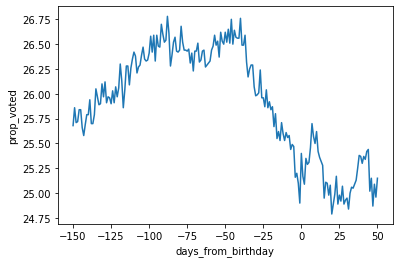

In [61]:
fig_df = prop_voted.groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig6_FL_all_elections_all_voters.png")

### +/- 30 days

In [62]:
prop_voted_30d = prop_voted[prop_voted.days.between(-30, 30)]

In [63]:
prop_voted_30d['days_from_birthday'] = np.where(prop_voted_30d.days!=0, '+/- 30', '0')
prop_voted_30d_grouped = prop_voted_30d.groupby('days_from_birthday').voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_30d_grouped['n_nonvoters'] = prop_voted_30d_grouped.n_total - prop_voted_30d_grouped.n_voters
prop_voted_30d_grouped.prop_voted = (prop_voted_30d_grouped.prop_voted*100).round(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
prop_voted_30d_grouped.n_voters = prop_voted_30d_grouped.n_voters.astype(int)
prop_voted_30d_grouped.n_nonvoters = prop_voted_30d_grouped.n_nonvoters.astype(int)

In [65]:
prop_voted_30d_grouped

,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,+/- 30,25.42,16152564,4105922,12046642
1,0,25.40,265507,67432,198075


In [66]:
prop_voted_30d_grouped.to_csv('tab6_FL_30d_all_elections_all_voters.csv')

### +/- 7 days

In [67]:
prop_voted_7d = prop_voted[prop_voted.days.between(-7, 7)]

In [68]:
prop_voted_7d['days_from_birthday'] = np.where(prop_voted_7d.days!=0, '+/- 7', '0')
prop_voted_7d_grouped = prop_voted_7d.groupby('days_from_birthday').voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_7d_grouped['n_nonvoters'] = prop_voted_7d_grouped.n_total - prop_voted_7d_grouped.n_voters
prop_voted_7d_grouped.prop_voted = (prop_voted_7d_grouped.prop_voted*100).round(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
prop_voted_30d_grouped.n_voters = prop_voted_7d_grouped.n_voters.astype(int)
prop_voted_30d_grouped.n_nonvoters = prop_voted_7d_grouped.n_nonvoters.astype(int)

In [70]:
prop_voted_7d_grouped

,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,+/- 7,25.3,3748330,948180.0,2800150.0
1,0,25.4,265507,67432.0,198075.0


In [71]:
prop_voted_7d_grouped.to_csv('tab7_FL_7d_all_elections_all_voters.csv')

## Group by Election Type

### General

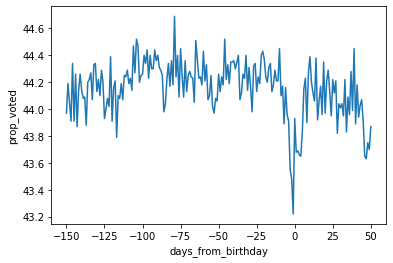

In [72]:
fig_df = prop_voted[prop_voted.election_type=='GEN'].groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig7_FL_gen_elections_all_voters.png")

### Primary

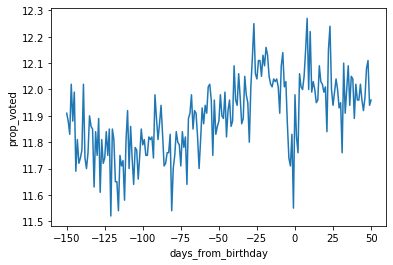

In [73]:
fig_df = prop_voted[prop_voted.election_type=='PRI'].groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig8_FL_pri_elections_all_voters.png")

### +/- 30 days

In [74]:
prop_voted_30d_grouped_type = prop_voted_30d.groupby(['election_type','days_from_birthday']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_30d_grouped_type['n_nonvoters'] = prop_voted_30d_grouped_type.n_total - prop_voted_30d_grouped_type.n_voters
prop_voted_30d_grouped_type.prop_voted = (prop_voted_30d_grouped_type.prop_voted*100).round(2)

In [75]:
prop_voted_30d_grouped_type.n_voters = prop_voted_30d_grouped_type.n_voters.astype(int)
prop_voted_30d_grouped_type.n_nonvoters = prop_voted_30d_grouped_type.n_nonvoters.astype(int)

In [76]:
prop_voted_30d_grouped_type

,election_type,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,GEN,+/- 30,44.09,6751330,2976794,3774536
1,GEN,0,43.93,111495,48975,62520
2,PRI,+/- 30,12.01,9401234,1129128,8272106
3,PRI,0,11.98,154012,18457,135555


In [77]:
prop_voted_30d_grouped_type.to_csv('tab8_FL_30d_election_type_all_voters.csv')

### +/- 7 days

In [78]:
prop_voted_7d_grouped_type = prop_voted_7d.groupby(['election_type','days_from_birthday']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_7d_grouped_type['n_nonvoters'] = prop_voted_7d_grouped_type.n_total - prop_voted_7d_grouped_type.n_voters
prop_voted_7d_grouped_type.prop_voted = (prop_voted_7d_grouped_type.prop_voted*100).round(2)

In [79]:
prop_voted_7d_grouped_type.n_voters = prop_voted_7d_grouped_type.n_voters.astype(int)
prop_voted_7d_grouped_type.n_nonvoters = prop_voted_7d_grouped_type.n_nonvoters.astype(int)

In [80]:
prop_voted_7d_grouped_type

,election_type,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,GEN,+/- 7,43.79,1574642,689535,885107
1,GEN,0,43.93,111495,48975,62520
2,PRI,+/- 7,11.90,2173688,258645,1915043
3,PRI,0,11.98,154012,18457,135555


In [81]:
prop_voted_30d_grouped_type.to_csv('tab9_FL_7d_election_type_all_voters.csv')

## Group by Election Year

### Presidential

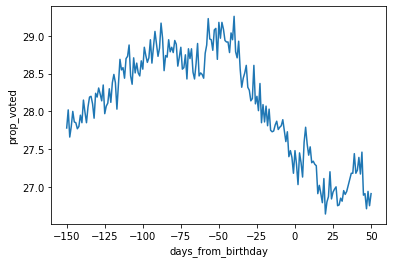

In [82]:
fig_df = prop_voted[prop_voted.election_type2=='Presidential'].groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig9_FL_pres_elections_all_voters.png")

### Midterms

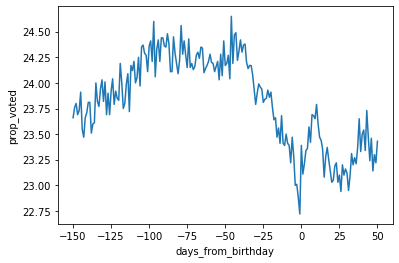

In [83]:
fig_df = prop_voted[prop_voted.election_type2=='Midterms'].groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig10_FL_mid_elections_all_voters.png")

### +/- 30 days

In [84]:
prop_voted_30d_grouped_type = prop_voted_30d.groupby(['election_type2','days_from_birthday']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_30d_grouped_type['n_nonvoters'] = prop_voted_30d_grouped_type.n_total - prop_voted_30d_grouped_type.n_voters
prop_voted_30d_grouped_type.prop_voted = (prop_voted_30d_grouped_type.prop_voted*100).round(2)

In [85]:
prop_voted_30d_grouped_type.n_voters = prop_voted_30d_grouped_type.n_voters.astype(int)
prop_voted_30d_grouped_type.n_nonvoters = prop_voted_30d_grouped_type.n_nonvoters.astype(int)

In [86]:
prop_voted_30d_grouped_type

,election_type2,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,Midterms,+/- 30,23.43,8246287,1931770,6314517
1,Midterms,0,23.39,135298,31645,103653
2,Presidential,+/- 30,27.50,7906277,2174152,5732125
3,Presidential,0,27.48,130209,35787,94422


In [87]:
prop_voted_30d_grouped_type.to_csv('tab10_FL_30d_election_year_all_voters.csv')

### +/- 7 days

In [88]:
prop_voted_7d_grouped_type = prop_voted_7d.groupby(['election_type2','days_from_birthday']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_7d_grouped_type['n_nonvoters'] = prop_voted_7d_grouped_type.n_total - prop_voted_7d_grouped_type.n_voters
prop_voted_7d_grouped_type.prop_voted = (prop_voted_7d_grouped_type.prop_voted*100).round(2)

In [89]:
prop_voted_7d_grouped_type.n_voters = prop_voted_7d_grouped_type.n_voters.astype(int)
prop_voted_7d_grouped_type.n_nonvoters = prop_voted_7d_grouped_type.n_nonvoters.astype(int)

In [90]:
prop_voted_7d_grouped_type

,election_type2,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,Midterms,+/- 7,23.23,1910052,443781,1466271
1,Midterms,0,23.39,135298,31645,103653
2,Presidential,+/- 7,27.44,1838278,504399,1333879
3,Presidential,0,27.48,130209,35787,94422


In [91]:
prop_voted_30d_grouped_type.to_csv('tab11_FL_7d_election_year_all_voters.csv')

# 5.0 Voter Turnout On Birthday - Young Voters (18 - 25)

## All Elections

In [92]:
prop_voted = df[(df.age.between(18, 25)) & (df.days.between(-150, 50))]

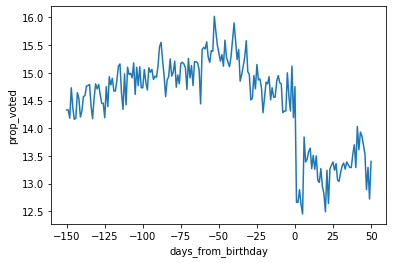

In [93]:
fig_df = prop_voted.groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig11_FL_all_elections_young_voters.png")

### +/- 30 days

In [94]:
prop_voted_30d = prop_voted[prop_voted.days.between(-30, 30)]

In [95]:
prop_voted_30d['days_from_birthday'] = np.where(prop_voted_30d.days!=0, '+/- 30', '0')
prop_voted_30d_grouped = prop_voted_30d.groupby('days_from_birthday').voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_30d_grouped['n_nonvoters'] = prop_voted_30d_grouped.n_total - prop_voted_30d_grouped.n_voters
prop_voted_30d_grouped.prop_voted = (prop_voted_30d_grouped.prop_voted*100).round(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
prop_voted_30d_grouped.n_voters = prop_voted_30d_grouped.n_voters.astype(int)
prop_voted_30d_grouped.n_nonvoters = prop_voted_30d_grouped.n_nonvoters.astype(int)

In [97]:
prop_voted_30d_grouped

,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,+/- 30,13.89,2044306,284012,1760294
1,0,14.75,32213,4753,27460


In [98]:
prop_voted_30d_grouped.to_csv('tab12_FL_30d_all_elections_young_voters.csv')

### +/- 7 days

In [99]:
prop_voted_7d = prop_voted[prop_voted.days.between(-7, 7)]

In [100]:
prop_voted_7d['days_from_birthday'] = np.where(prop_voted_7d.days!=0, '+/- 7', '0')
prop_voted_7d_grouped = prop_voted_7d.groupby('days_from_birthday').voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_7d_grouped['n_nonvoters'] = prop_voted_7d_grouped.n_total - prop_voted_7d_grouped.n_voters
prop_voted_7d_grouped.prop_voted = (prop_voted_7d_grouped.prop_voted*100).round(2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
prop_voted_30d_grouped.n_voters = prop_voted_7d_grouped.n_voters.astype(int)
prop_voted_30d_grouped.n_nonvoters = prop_voted_7d_grouped.n_nonvoters.astype(int)

In [102]:
prop_voted_7d_grouped

,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,+/- 7,13.74,458301,62965.0,395336.0
1,0,14.75,32213,4753.0,27460.0


In [103]:
prop_voted_7d_grouped.to_csv('tab13_FL_7d_all_elections_young_voters.csv')

## Group by Election Type

### General

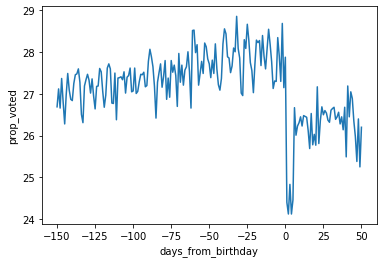

In [104]:
fig_df = prop_voted[prop_voted.election_type=='GEN'].groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig12_FL_gen_elections_young_voters.png")

### Primary

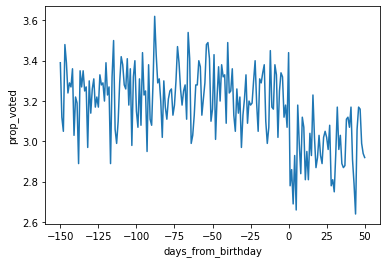

In [105]:
fig_df = prop_voted[prop_voted.election_type=='PRI'].groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig13_FL_pri_elections_young_voters.png")

### +/- 30 days

In [106]:
prop_voted_30d_grouped_type = prop_voted_30d.groupby(['election_type','days_from_birthday']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_30d_grouped_type['n_nonvoters'] = prop_voted_30d_grouped_type.n_total - prop_voted_30d_grouped_type.n_voters
prop_voted_30d_grouped_type.prop_voted = (prop_voted_30d_grouped_type.prop_voted*100).round(2)

In [107]:
prop_voted_30d_grouped_type.n_voters = prop_voted_30d_grouped_type.n_voters.astype(int)
prop_voted_30d_grouped_type.n_nonvoters = prop_voted_30d_grouped_type.n_nonvoters.astype(int)

In [108]:
prop_voted_30d_grouped_type

,election_type,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,GEN,+/- 30,26.93,927285,249722,677563
1,GEN,0,27.88,14916,4158,10758
2,PRI,+/- 30,3.07,1117021,34290,1082731
3,PRI,0,3.44,17297,595,16702


In [109]:
prop_voted_30d_grouped_type.to_csv('tab14_FL_30d_election_type_young_voters.csv')

### +/- 7 days

In [110]:
prop_voted_7d_grouped_type = prop_voted_7d.groupby(['election_type','days_from_birthday']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_7d_grouped_type['n_nonvoters'] = prop_voted_7d_grouped_type.n_total - prop_voted_7d_grouped_type.n_voters
prop_voted_7d_grouped_type.prop_voted = (prop_voted_7d_grouped_type.prop_voted*100).round(2)

In [111]:
prop_voted_7d_grouped_type.n_voters = prop_voted_7d_grouped_type.n_voters.astype(int)
prop_voted_7d_grouped_type.n_nonvoters = prop_voted_7d_grouped_type.n_nonvoters.astype(int)

In [112]:
prop_voted_7d_grouped_type

,election_type,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,GEN,+/- 7,26.34,210573,55467,155106
1,GEN,0,27.88,14916,4158,10758
2,PRI,+/- 7,3.03,247728,7498,240230
3,PRI,0,3.44,17297,595,16702


In [113]:
prop_voted_30d_grouped_type.to_csv('tab15_FL_7d_election_type_young_voters.csv')

## Group by Election Year

### Presidential

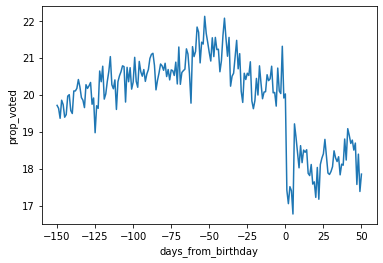

In [114]:
fig_df = prop_voted[prop_voted.election_type2=='Presidential'].groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig14_FL_pres_elections_young_voters.png")

### Midterms

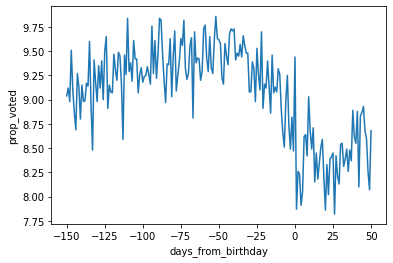

In [115]:
fig_df = prop_voted[prop_voted.election_type2=='Midterms'].groupby('days').voted.mean().reset_index()
fig_df.voted = (fig_df.voted*100).round(2)
fig_df.rename(columns={'days': 'days_from_birthday', 'voted': 'prop_voted'}, inplace=True)
plot = sns.lineplot(x='days_from_birthday', y='prop_voted',data=fig_df)
fig = plot.get_figure()
fig.savefig("fig15_FL_mid_elections_young_voters.png")

### +/- 30 days

In [116]:
prop_voted_30d_grouped_type = prop_voted_30d.groupby(['election_type2','days_from_birthday']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_30d_grouped_type['n_nonvoters'] = prop_voted_30d_grouped_type.n_total - prop_voted_30d_grouped_type.n_voters
prop_voted_30d_grouped_type.prop_voted = (prop_voted_30d_grouped_type.prop_voted*100).round(2)

In [117]:
prop_voted_30d_grouped_type.n_voters = prop_voted_30d_grouped_type.n_voters.astype(int)
prop_voted_30d_grouped_type.n_nonvoters = prop_voted_30d_grouped_type.n_nonvoters.astype(int)

In [118]:
prop_voted_30d_grouped_type

,election_type2,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,Midterms,+/- 30,8.69,1024684,89062,935622
1,Midterms,0,9.44,16031,1513,14518
2,Presidential,+/- 30,19.12,1019622,194950,824672
3,Presidential,0,20.02,16182,3240,12942


In [119]:
prop_voted_30d_grouped_type.to_csv('tab16_FL_30d_election_year_young_voters.csv')

### +/- 7 days

In [120]:
prop_voted_7d_grouped_type = prop_voted_7d.groupby(['election_type2','days_from_birthday']).voted.agg(['mean','count','sum']).reset_index().rename(columns={'mean': 'prop_voted', 'count': 'n_total', 'sum': 'n_voters'})
prop_voted_7d_grouped_type['n_nonvoters'] = prop_voted_7d_grouped_type.n_total - prop_voted_7d_grouped_type.n_voters
prop_voted_7d_grouped_type.prop_voted = (prop_voted_7d_grouped_type.prop_voted*100).round(2)

In [121]:
prop_voted_7d_grouped_type.n_voters = prop_voted_7d_grouped_type.n_voters.astype(int)
prop_voted_7d_grouped_type.n_nonvoters = prop_voted_7d_grouped_type.n_nonvoters.astype(int)

In [122]:
prop_voted_7d_grouped_type

,election_type2,days_from_birthday,prop_voted,n_total,n_voters,n_nonvoters
0,Midterms,+/- 7,8.49,229589,19491,210098
1,Midterms,0,9.44,16031,1513,14518
2,Presidential,+/- 7,19.01,228712,43474,185238
3,Presidential,0,20.02,16182,3240,12942


In [123]:
prop_voted_30d_grouped_type.to_csv('tab17_FL_7d_election_year_young_voters.csv')